# Framingham_Dataset Analysis

## In late 1940s, U.S. Government set out to better understand cardiovascular disease (CVD)
### The plan was to track large cohort of initially health patients over time.
### For this study, Framingham was selected:
#### Appropriate size.
#### Stable population.
#### Cooperative doctors and residents.

### Demographic risk factors:

#### male: sex of patient
#### age: age in years at first examination
#### education: Some high school (1), high school/GED (2), some college/vocation school (3), college(4).

### Some significant variable suggest interventions

#### Smoking
#### Cholesterol
#### Systolic blood pressure
#### Glucose

## Link to the dataset: https://www.kaggle.com/datasets/navink25/framingham


### Required libraries:

In [78]:
import pandas as pd                 #data manipulation library
import numpy as np                 #scientific computing library
import matplotlib.pyplot as plt   #data visualization library
import seaborn as sns            #data visualization library
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split                    #to split the data
#model classifiers
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
import seaborn as sns                                                #data visualization library
from sklearn.metrics import accuracy_score                          #to measure the accuracy of the classifiers


# Initial data exploration:


In [43]:
#To read the csv file
df=pd.read_csv('Downloads/framingham.csv')

In [44]:
#to view first five rows
df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [45]:
#to know the columns of the dataset
df.columns

Index(['male', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

In [46]:
#to know more about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4240 non-null   int64  
 1   age              4240 non-null   int64  
 2   education        4135 non-null   float64
 3   currentSmoker    4240 non-null   int64  
 4   cigsPerDay       4211 non-null   float64
 5   BPMeds           4187 non-null   float64
 6   prevalentStroke  4240 non-null   int64  
 7   prevalentHyp     4240 non-null   int64  
 8   diabetes         4240 non-null   int64  
 9   totChol          4190 non-null   float64
 10  sysBP            4240 non-null   float64
 11  diaBP            4240 non-null   float64
 12  BMI              4221 non-null   float64
 13  heartRate        4239 non-null   float64
 14  glucose          3852 non-null   float64
 15  TenYearCHD       4240 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 530.1 KB


# Dealing with duplicate rows and missing values:

In [47]:
#to check duplicate rows
df.duplicated().sum()

0

### There is no duplicate values in the dataset.

In [48]:
#count missing values per column
df.isna().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [49]:
#put it on ascending order
df.isna().sum().sort_values(ascending=False)

glucose            388
education          105
BPMeds              53
totChol             50
cigsPerDay          29
BMI                 19
heartRate            1
male                 0
age                  0
currentSmoker        0
prevalentStroke      0
prevalentHyp         0
diabetes             0
sysBP                0
diaBP                0
TenYearCHD           0
dtype: int64

<AxesSubplot:>

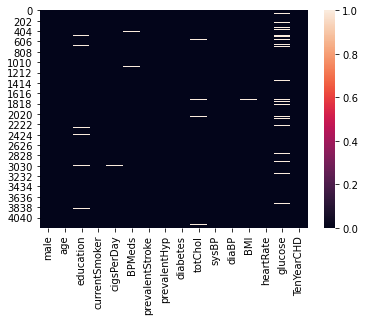

In [50]:
#to visualise the missing values
sns.heatmap(df.isnull())

<AxesSubplot:>

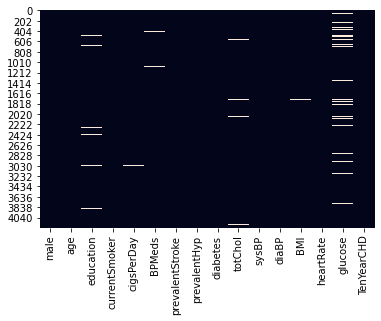

In [51]:
#we can get rid of color bar as it is not necessary here
sns.heatmap(df.isnull(),cbar=False)

### To check for outliers:

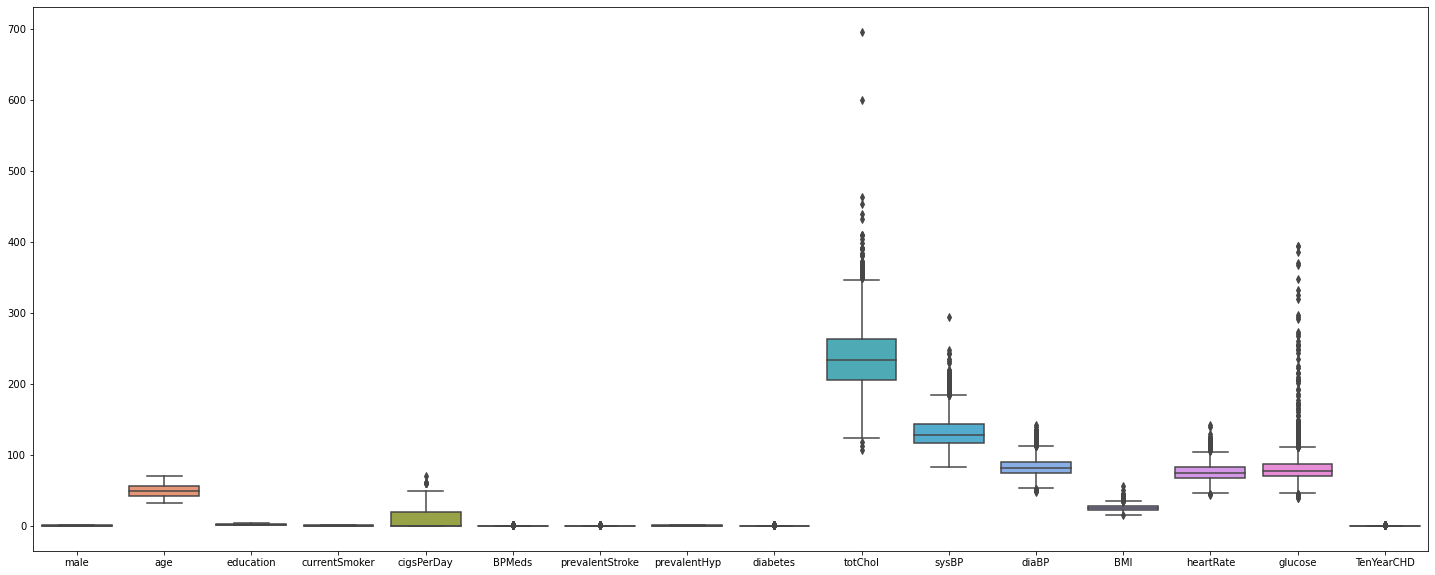

In [53]:
plt.figure(figsize=(25,10), facecolor='w')
sns.boxplot(data=df)
plt.show()

## Here, we can see that 'totChol', 'sysBP', 'diaBP', 'BMI' 'heartRate', 'glucose' have outliers:

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
male,1.000000,-0.029014,0.017415,0.197026,0.317143,-0.052504,-0.004550,0.005853,0.015693,-0.070413,-0.035879,0.058199,0.081871,-0.116932,0.005979,0.088374
age,-0.029014,1.000000,-0.166356,-0.213662,-0.192959,0.123052,0.057679,0.306799,0.101314,0.262554,0.394053,0.205586,0.136096,-0.012843,0.122356,0.225408
education,0.017415,-0.166356,1.000000,0.018528,0.008323,-0.010898,-0.035142,-0.081726,-0.038749,-0.023613,-0.129496,-0.061919,-0.137747,-0.054182,-0.035843,-0.054248
currentSmoker,0.197026,-0.213662,0.018528,1.000000,0.769774,-0.048927,-0.032980,-0.103710,-0.044285,-0.046488,-0.130281,-0.107933,-0.167857,0.062686,-0.056726,0.019448
cigsPerDay,0.317143,-0.192959,0.008323,0.769774,1.000000,-0.046155,-0.032711,-0.066645,-0.037089,-0.026479,-0.088797,-0.056715,-0.093293,0.075564,-0.058886,0.057755
BPMeds,-0.052504,0.123052,-0.010898,-0.048927,-0.046155,1.000000,0.117370,0.261067,0.052060,0.080623,0.254194,0.194122,0.100702,0.015230,0.051197,0.087519
prevalentStroke,-0.004550,0.057679,-0.035142,-0.032980,-0.032711,0.117370,1.000000,0.074791,0.006955,0.000105,0.057000,0.045153,0.025909,-0.017674,0.018440,0.061823
prevalentHyp,0.005853,0.306799,-0.081726,-0.103710,-0.066645,0.261067,0.074791,1.000000,0.077752,0.163632,0.696656,0.615840,0.301344,0.146815,0.086656,0.177458
diabetes,0.015693,0.101314,-0.038749,-0.044285,-0.037089,0.052060,0.006955,0.077752,1.000000,0.040348,0.111265,0.050260,0.087068,0.048986,0.617630,0.097344
totChol,-0.070413,0.262554,-0.023613,-0.046488,-0.026479,0.080623,0.000105,0.163632,0.040348,1.000000,0.208734,0.164698,0.115992,0.091127,0.046538,0.082369


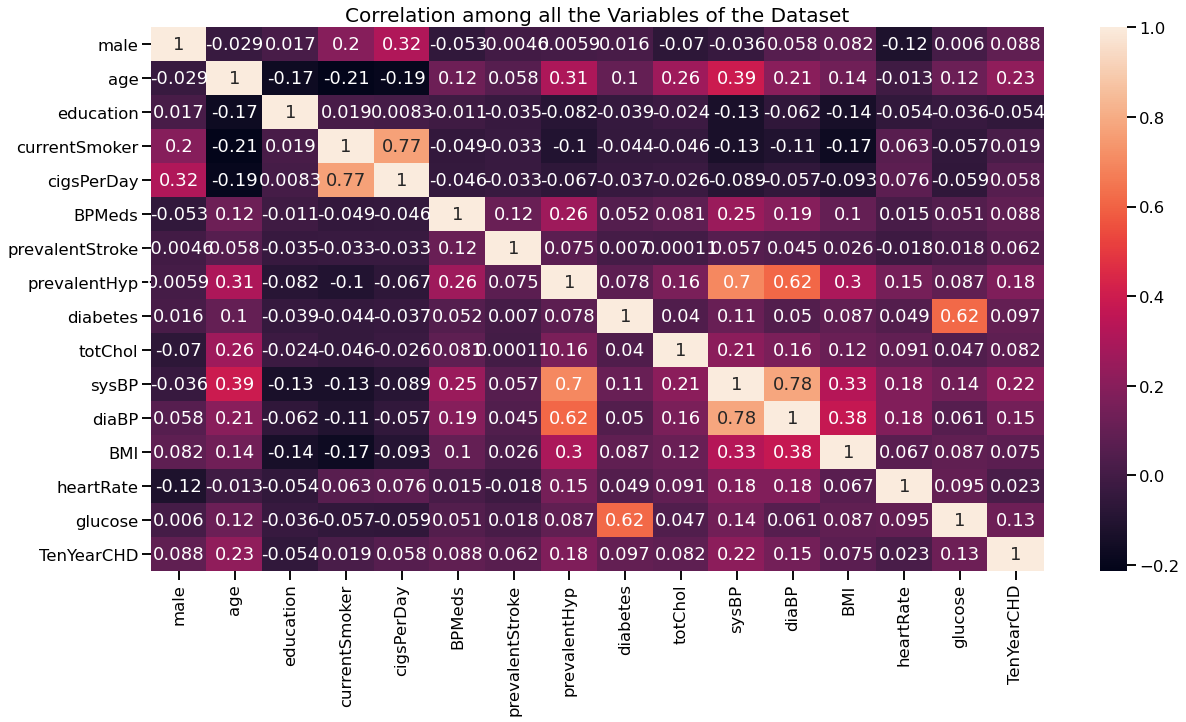

In [56]:
#Checking relationship between variables
cor=df.corr()
plt.figure(figsize=(20,10), facecolor='w')
sns.heatmap(cor,xticklabels=cor.columns,yticklabels=cor.columns,annot=True)
plt.title("Correlation among all the Variables of the Dataset", size=20)
cor

### Observations :

### Compared to all the independent data, the correlation coefficient between education and and target variable TenYearCHD is very low and actually negligable.



#### Correlation plot gives us valuable information regarding Relation within Attributes. It can Either be Negative or Positive or Nill. We need to always keep 1 feature from 2 Strongly Correlated ones but since we want to perform EDA we'll keep all and drop them before modelling.

#### currentSmoker & cigsPerDay has strong Correlation of 0.77 (highly correlated)

In [59]:
# education feature is not required as its not predicting the Ten Year CHD
# target is Ten Year CHD (0 or 1)
df.drop('education', axis=1, inplace=True)

In [61]:
#to recheck
df.head()

,male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [98]:
y = df['TenYearCHD']
X = df.drop(['TenYearCHD'], axis=1)
train_x, test_x, train_y, test_y = train_test_split(X, y, test_size=0.3, random_state=1)

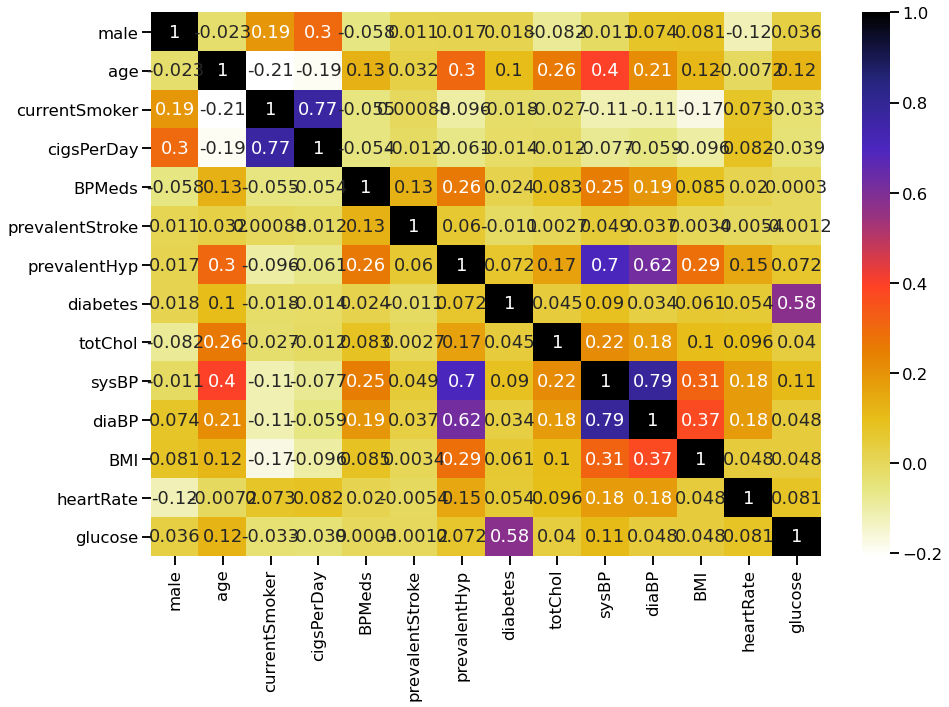

In [99]:
#Using Pearson Correlation
plt.figure(figsize=(15,10))
cor = train_x.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r)
plt.show()

In [82]:
# with the following function we can select highly correlated features
# it will remove the first feature that is correlated with anything other feature

def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [83]:
corr_features = correlation(X_train, 0.7)
len(set(corr_features))

2

In [84]:
corr_features

{'cigsPerDay', 'diaBP'}

In [85]:
X_train.drop(corr_features,axis=1)
X_test.drop(corr_features,axis=1)

,male,age,currentSmoker,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,BMI,heartRate,glucose
1465,0,47,1,0.0,0,1,0,325.0,160.0,32.07,95.0,87.0
302,0,55,0,0.0,0,0,0,220.0,117.5,26.20,90.0,75.0
87,0,61,1,0.0,0,1,0,326.0,200.0,38.46,57.0,78.0
843,0,46,0,0.0,0,0,0,225.0,116.0,29.21,60.0,70.0
1431,1,39,0,0.0,0,0,0,213.0,130.0,22.32,80.0,78.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1343,0,44,1,0.0,0,0,0,200.0,111.0,27.29,95.0,74.0
2452,1,48,1,0.0,0,0,0,187.0,102.0,24.24,68.0,72.0
3406,1,41,1,0.0,0,0,0,212.0,112.0,25.20,80.0,76.0
2640,0,53,0,0.0,0,1,0,342.0,144.0,32.60,75.0,75.0


## Dealing with the missing values:

### Usually we fill Null Values with Measures of Central Tendency (Mean / Median / Mode) or we've techniqus like Forward / Backward fill but in this case we can observe the Correlation plot and consider it to Fill missing values. E.g., We have Positive Correlation between currentSmoker & cigsPerDay, we know that currentSmoker has values either 1 (is a Smoker) or 0 (is not a Smoker), we can groupby currentSmoker and Impute Missing values based on Median. We can do the same for BMI based on male (Gender) & Age.

In [86]:
#User defined function for missing value imputation

def impute_median(data):
    return data.fillna(data.median())


In [87]:
#median imputation

df.glucose = df['glucose'].transform(impute_median)
df.heartRate = df['heartRate'].transform(impute_median)
df.totChol = df['totChol'].transform(impute_median)
df.BPMeds = df['BPMeds'].transform(impute_median)

## group by classes that are in relation with other classes

by_age = df.groupby(['male','age'])
df.BMI = by_age['BMI'].transform(impute_median)

In [88]:
#Rechecking if we have any missing value left

df.isnull().sum()

male               0
age                0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

In [89]:
#Descriptive Stats

df.describe()

,male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000
mean,0.429245,49.580189,0.494104,9.081132,0.029245,0.005896,0.310613,0.025708,236.667689,132.354599,82.897759,25.798756,75.878774,81.326415,0.151887
std,0.495027,8.572942,0.500024,11.916119,0.168513,0.076569,0.462799,0.158280,44.328480,22.033300,11.910394,4.072774,12.023937,22.919885,0.358953
min,0.000000,32.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.077500,68.000000,72.000000,0.000000
50%,0.000000,49.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.397500,75.000000,77.000000,0.000000
75%,1.000000,56.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,262.000000,144.000000,90.000000,28.040000,83.000000,85.000000,0.000000
max,1.000000,70.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


Text(0.5, 1.0, 'Distribution of HeartRate')

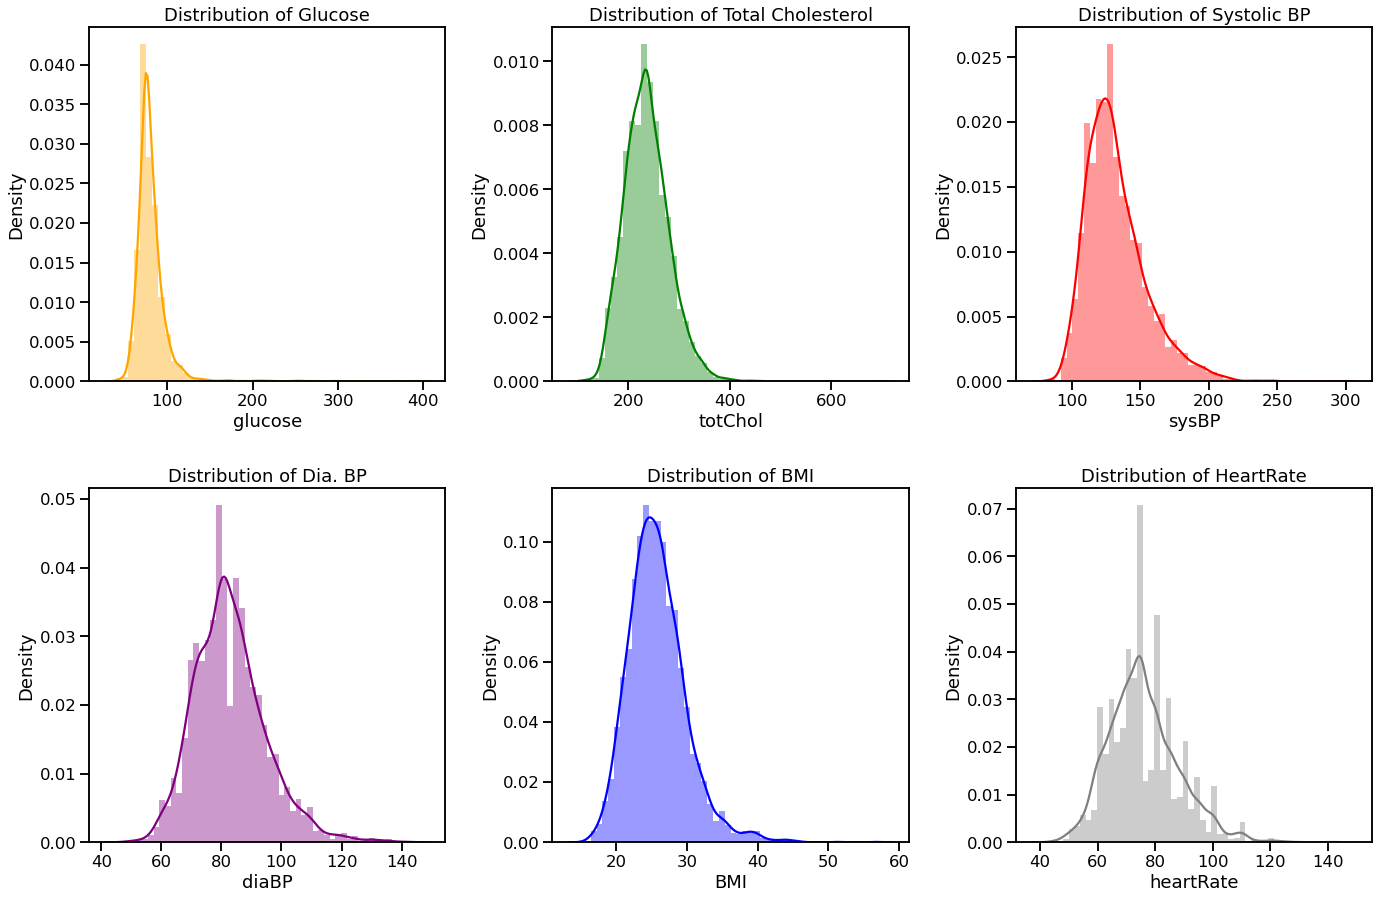

In [90]:
#Distribution of Continuous variables

plt.figure(figsize=(23,15))
plt.subplots_adjust(wspace=0.3, hspace=0.3)

plt.subplot(2, 3, 1)
sns.distplot(df['glucose'] , color='orange')
plt.title('Distribution of Glucose')

plt.subplot(2, 3, 2)
sns.distplot(df['totChol'], color='g')
plt.title('Distribution of Total Cholesterol')

plt.subplot(2, 3, 3)
sns.distplot(df['sysBP'], color='r')
plt.title('Distribution of Systolic BP')

plt.subplot(2, 3, 4)
sns.distplot(df['diaBP'] , color='purple')
plt.title('Distribution of Dia. BP')

plt.subplot(2, 3, 5)
sns.distplot(df['BMI'], color='blue')
plt.title('Distribution of BMI')

plt.subplot(2, 3, 6)
sns.distplot(df['heartRate'], color='grey')
plt.title('Distribution of HeartRate')

### We can see Glucose, Total Cholesterol, Systolic BP & BMI is Right Skewed.
### While Diastolic BP & Heart Rate are close to Normal / Gaussian Distribution.

Text(0.5, 1.0, 'Agewise distribution of the patients')

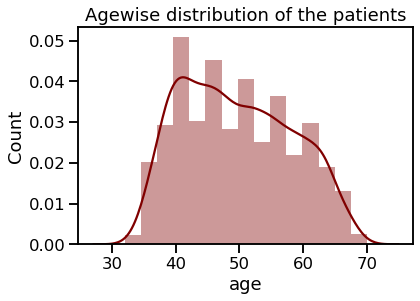

In [91]:
sns.distplot(df['age'], bins=15, kde=True, color='maroon')
plt.ylabel('Count')
plt.title('Agewise distribution of the patients')

### Subjects ranging from Age 40 to 50 are in Majority followed by 50 to 70.
### Let us define a user-defined Function to encode Age.

In [112]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, roc_curve, classification_report
# Data Scaling
from sklearn.preprocessing import MinMaxScaler

In [113]:
scaler = MinMaxScaler()
train_x = scaler.fit_transform(train_x)
test_x = scaler.transform(test_x)

In [114]:
m1 = 'LogisticRegression'
lr = LogisticRegression(random_state=1, max_iter=1000)
model = lr.fit(train_x, train_y)
lr_predict = lr.predict(test_x)
lr_conf_matrix = confusion_matrix(test_y, lr_predict)
lr_acc_score = accuracy_score(test_y, lr_predict)
print("confussion matrix")
print(lr_conf_matrix)
print("\n")
print("Accuracy of Logistic Regression:",lr_acc_score*100,'\n')
print(classification_report(test_y,lr_predict))

confussion matrix
[[1081    4]
 [ 177   10]]


Accuracy of Logistic Regression: 85.77044025157232 

              precision    recall  f1-score   support

           0       0.86      1.00      0.92      1085
           1       0.71      0.05      0.10       187

    accuracy                           0.86      1272
   macro avg       0.79      0.52      0.51      1272
weighted avg       0.84      0.86      0.80      1272



In [115]:
m2 = 'KNeighborsClassifier'
knn = KNeighborsClassifier(n_neighbors=1)
model = knn.fit(train_x, train_y)
knn_predict = knn.predict(test_x)
knn_conf_matrix = confusion_matrix(test_y, knn_predict)
knn_acc_score = accuracy_score(test_y, knn_predict)
print("confussion matrix")
print(knn_conf_matrix)
print("\n")
print("Accuracy of k-NN Classification:",knn_acc_score*100,'\n')
print(classification_report(test_y, knn_predict))

confussion matrix
[[959 126]
 [150  37]]


Accuracy of k-NN Classification: 78.30188679245283 

              precision    recall  f1-score   support

           0       0.86      0.88      0.87      1085
           1       0.23      0.20      0.21       187

    accuracy                           0.78      1272
   macro avg       0.55      0.54      0.54      1272
weighted avg       0.77      0.78      0.78      1272



In [116]:
m3 = 'Random Forest Classfier'
rf = RandomForestClassifier(n_estimators=200, random_state=0,max_depth=12)
rf.fit(train_x,train_y)
rf_predicted = rf.predict(test_x)
rf_conf_matrix = confusion_matrix(test_y, rf_predicted)
rf_acc_score = accuracy_score(test_y, rf_predicted)
print("confussion matrix")
print(rf_conf_matrix)
print("\n")
print("Accuracy of Random Forest:",rf_acc_score*100,'\n')
print(classification_report(test_y,rf_predicted))

confussion matrix
[[1077    8]
 [ 181    6]]


Accuracy of Random Forest: 85.14150943396226 

              precision    recall  f1-score   support

           0       0.86      0.99      0.92      1085
           1       0.43      0.03      0.06       187

    accuracy                           0.85      1272
   macro avg       0.64      0.51      0.49      1272
weighted avg       0.79      0.85      0.79      1272



In [117]:
m4 = 'DecisionTreeClassifier'
dt = DecisionTreeClassifier(criterion = 'entropy',random_state=0,max_depth = 30)
dt.fit(train_x,train_y)
dt_predicted = dt.predict(test_x)
dt_conf_matrix = confusion_matrix(test_y, dt_predicted)
dt_acc_score = accuracy_score(test_y, dt_predicted)
print("confussion matrix")
print(dt_conf_matrix)
print("\n")
print("Accuracy of DecisionTreeClassifier:",dt_acc_score*100,'\n')
print(classification_report(test_y,dt_predicted))

confussion matrix
[[936 149]
 [139  48]]


Accuracy of DecisionTreeClassifier: 77.35849056603774 

              precision    recall  f1-score   support

           0       0.87      0.86      0.87      1085
           1       0.24      0.26      0.25       187

    accuracy                           0.77      1272
   macro avg       0.56      0.56      0.56      1272
weighted avg       0.78      0.77      0.78      1272



# Helpful links:

## https://seaborn.pydata.org/examples/index.html
## https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html
## https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
## https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html